# Introduction
Anomaly Detection with ARIMA model
Anomaly Detection means to identify unexpected events in a process. It means to detect threats to our systems that may cause harm in terms of security and leakage of important information.

The importance of Anomaly Detection is not limited to security, but it is used for detection of any event that does not conform to our expectations. Here I will explain to you how we can use ARIMA model for Anomaly Detection.

I will use the data which is based on per-minute metrics of the host’s CPU utilization.

## Import Libraries

In [1]:
import pandas as pd
import pyflux as pf
from datetime import datetime

## Import Data
The data was sourced from here: https://github.com/oreilly-mlsec/book-resources/tree/master/chapter3/datasets/cpu-utilization

In [2]:
data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


## Visualize Data

Text(0.5, 1.0, 'CPU Utilization')

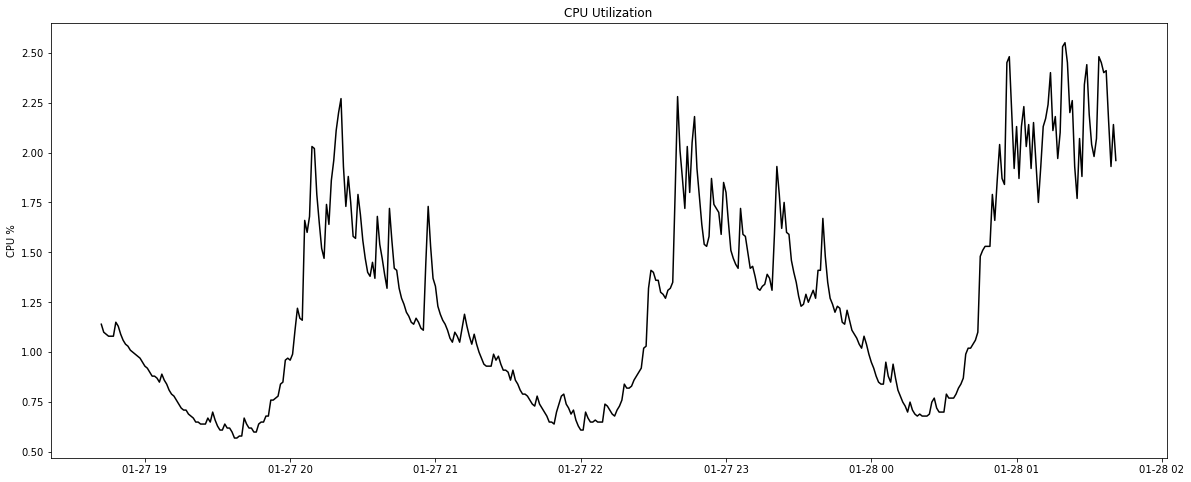

In [3]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [4]:
## Creating ARIMA model
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.02235
Acceptance rate of Metropolis-Hastings is 0.44295
Acceptance rate of Metropolis-Hastings is 0.3668

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.11555
Acceptance rate of Metropolis-Hastings is 0.4348
Acceptance rate of Metropolis-Hastings is 0.2781


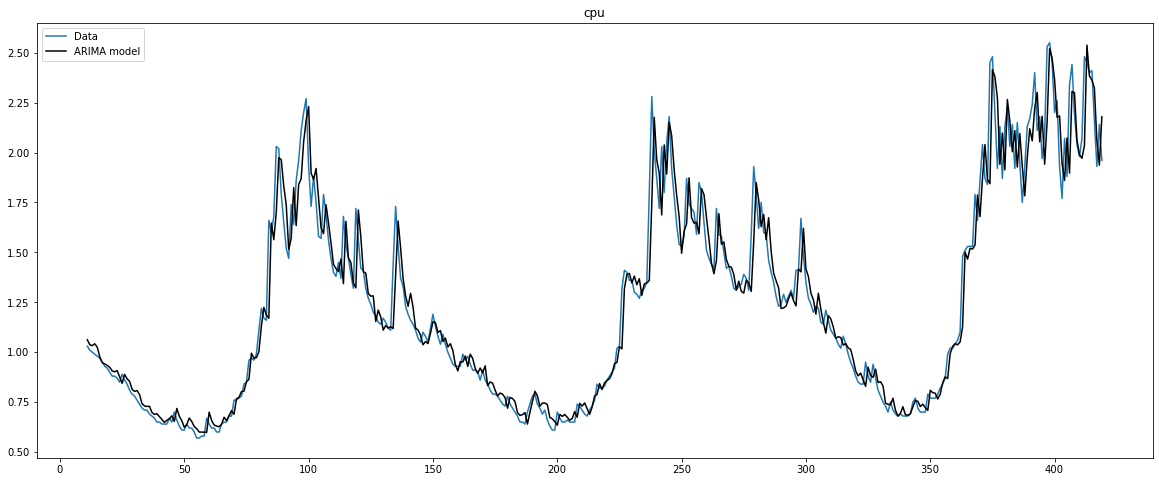

In [5]:
## Visualize the ARIMA model
model_a.plot_fit(figsize=(20,8))

The above model shows the CPU utilization over time fitted with the ARIMA model

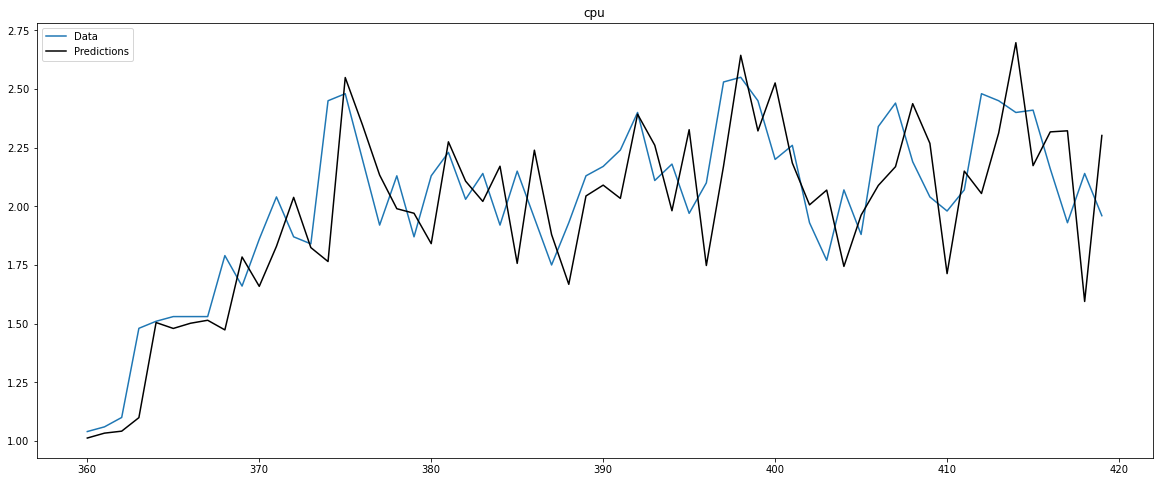

In [6]:
## Sample test to evaluate the performance of our model
model_a.plot_predict_is(h=60, figsize=(20,8))

The above model shosw the train-set of our ARIMA model

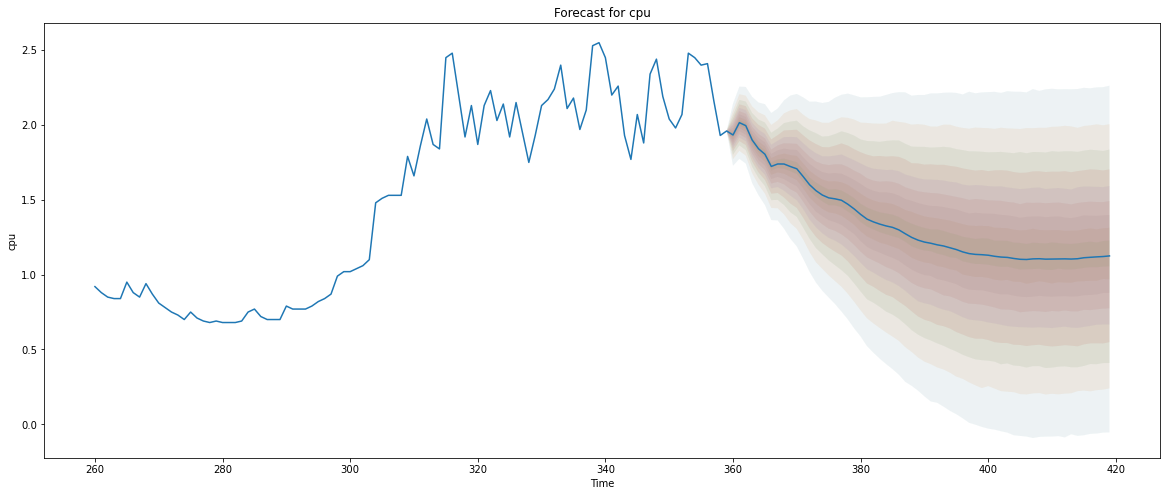

In [7]:
## Running the actual prediction
model_a.plot_predict(h=60,past_values=100,figsize=(20,8))

Now to perform the same anomaly detection over a different time period

Text(0.5, 1.0, 'CPU Utilization')

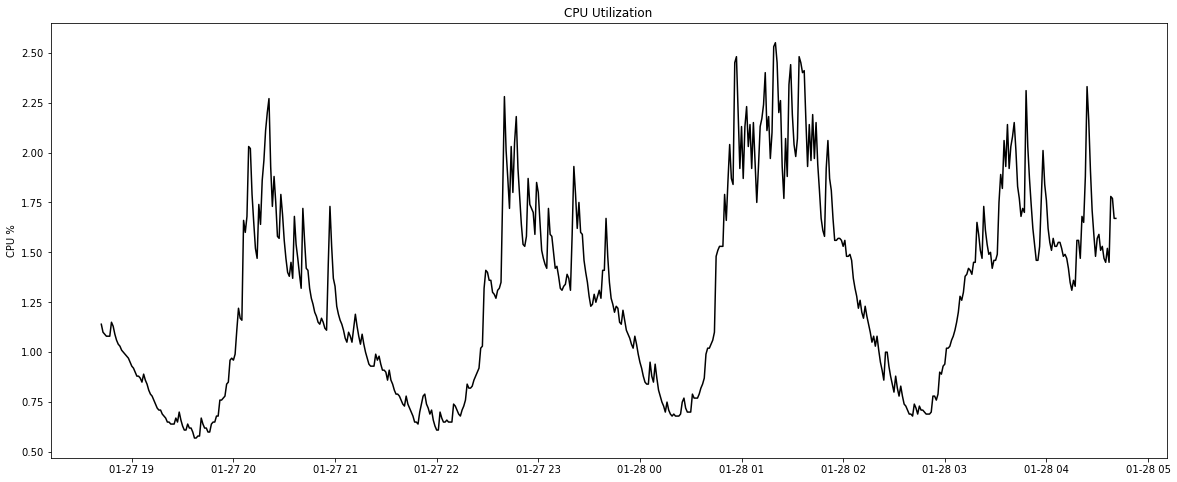

In [8]:
data_train_b = pd.read_csv('cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv('cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [9]:
## Fitting this data on the model
model_b = pf.ARIMA(data=data_train_b, ar=11, ma=11, integ=0, target='cpu')
x = model_b.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.01635
Acceptance rate of Metropolis-Hastings is 0.10635
Acceptance rate of Metropolis-Hastings is 0.1527
Acceptance rate of Metropolis-Hastings is 0.14575
Acceptance rate of Metropolis-Hastings is 0.29125

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.244075


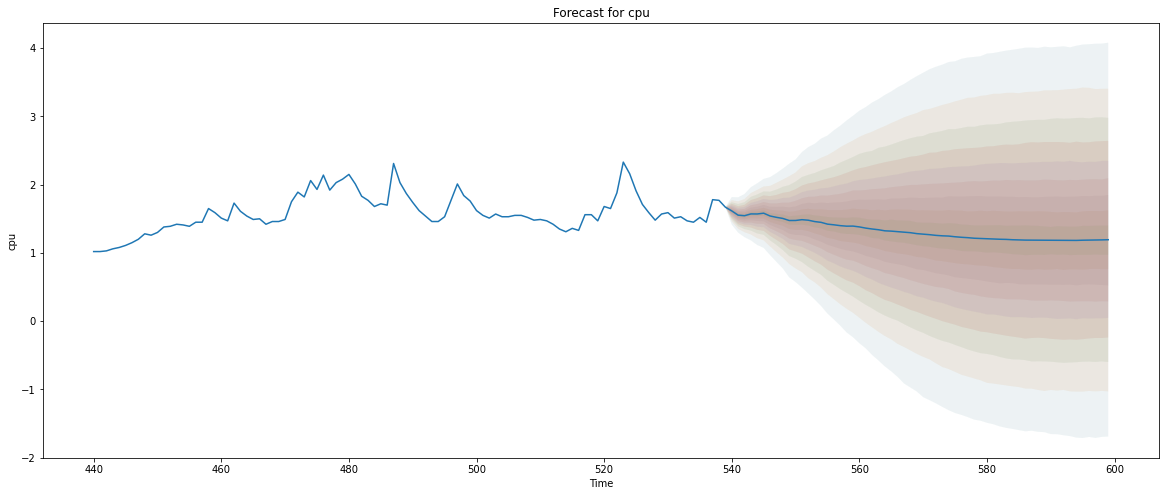

In [10]:
## Modeling the new data
model_b.plot_predict(h=60,past_values=100,figsize=(20,8))

We can visualize the anomaly that occurs a short time after the training period, as the observed values fall within the low-confidence bands, so it will raise an anomaly alert.